# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# Dr. Ryan @STEMplicity



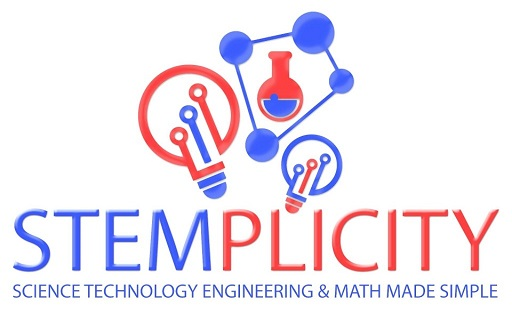

# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Bank_Customer_retirement.csv')
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [7]:
df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [8]:
df.shape

(500, 4)

In [9]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [10]:
df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

In [11]:
df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [12]:
vars=['Customer ID', 'Age', '401K Savings']

In [13]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

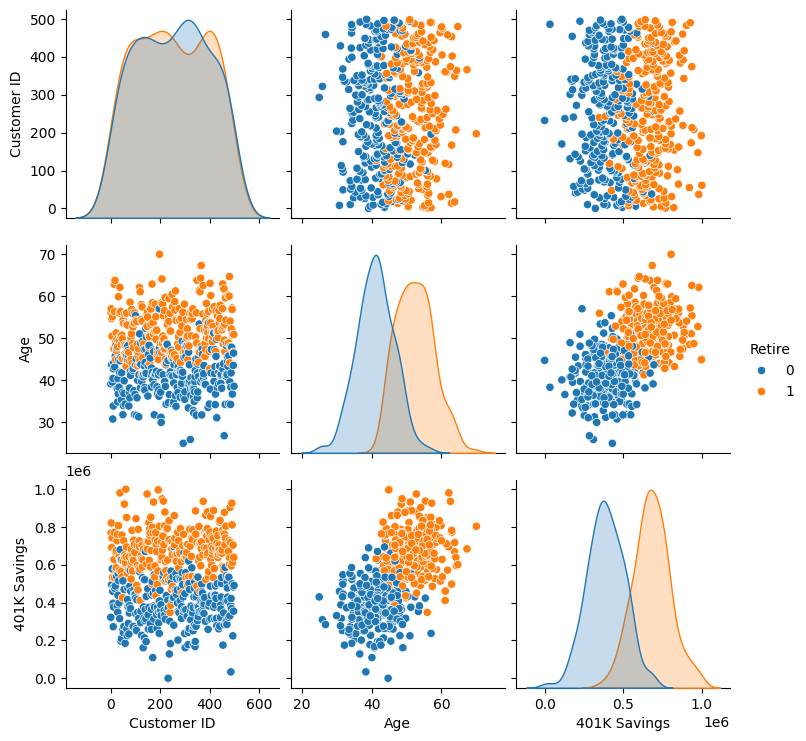

In [15]:
sns.pairplot(vars=vars, data=df, hue='Retire')

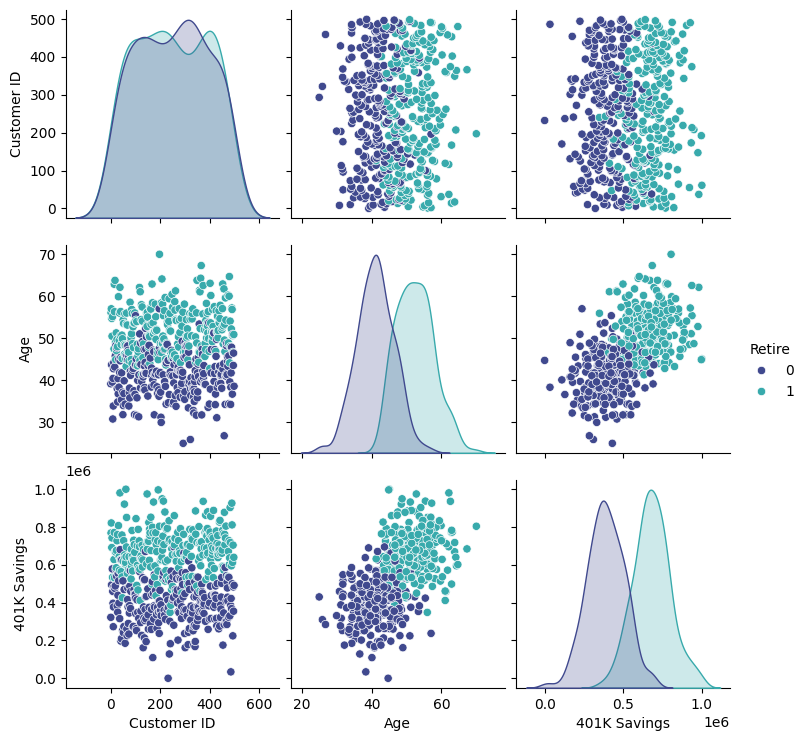

In [16]:
sns.pairplot(vars=vars, data=df, hue='Retire', palette='mako')

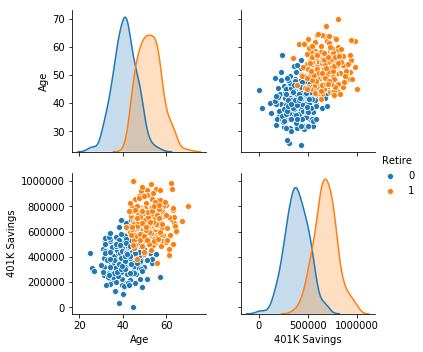

In [18]:
df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

/tmp/ipykernel_211572/989138634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Retire', data=df, palette='mako')


<Axes: xlabel='Retire', ylabel='count'>

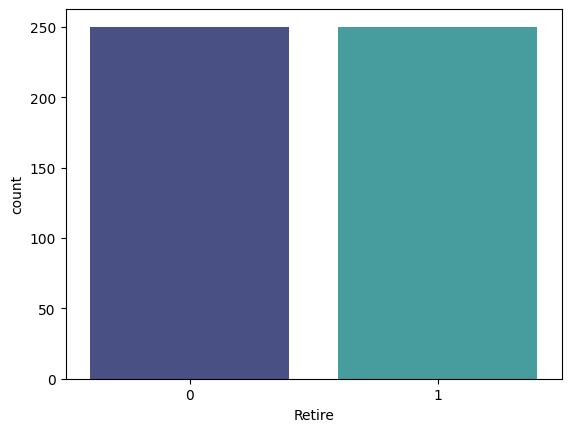

In [22]:
sns.countplot(x='Retire', data=df, palette='mako')

In [24]:
?sns.countplot

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

/tmp/ipykernel_211572/624609769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='401K Savings', data=df, palette='inferno')


<Axes: xlabel='401K Savings', ylabel='count'>

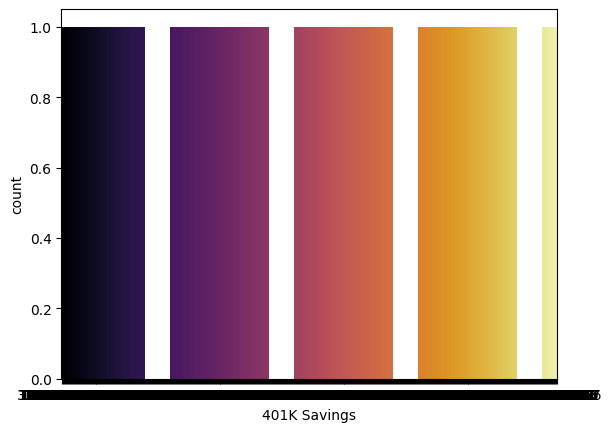

In [23]:
sns.countplot(x='401K Savings', data=df, palette='inferno')

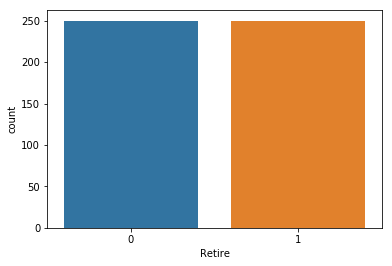

# STEP #4: MODEL TRAINING 

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [29]:
df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [32]:
?df.drop

Signature:
df.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list

In [51]:
#Improper use of the index parameter might lead to some observations to be removed unexpectedly
X = df.drop(columns=['Retire', 'Customer ID'], index=1)
X.head()

,Age,401K Savings
0,39.180417,322349.8740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
5,50.499789,742398.9068


In [55]:
X = df.drop(columns=['Retire', 'Customer ID'])
X.head()

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


In [46]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [47]:
df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [44]:
df['Retire']

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [37]:
y = df.Retire
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [38]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [56]:
X.shape, y.shape

((500, 2), (500,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=400)

In [60]:
X_train.shape

(400, 2)

In [61]:
X_test.shape

(100, 2)

In [62]:
y_train.shape

(400,)

In [63]:
y_test.shape

(100,)

In [64]:
from sklearn.svm import SVC

In [67]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# STEP #5: EVALUATING THE MODEL

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
y_test_predict = svm_model.predict(X_test)
y_test_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

<Axes: >

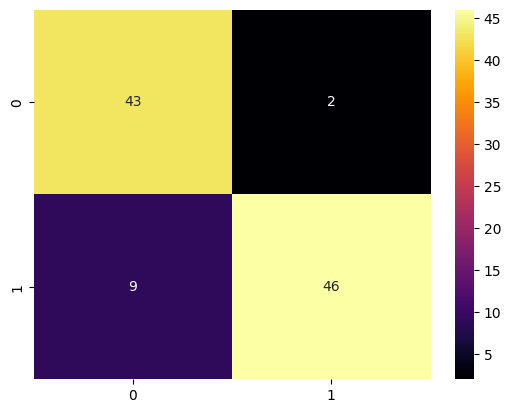

In [71]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, cmap='inferno')

In [73]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        45
           1       0.96      0.84      0.89        55

    accuracy                           0.89       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100



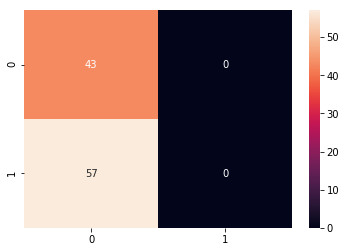

             precision    recall  f1-score   support

          0       0.43      1.00      0.60        43
          1       0.00      0.00      0.00        57

avg / total       0.18      0.43      0.26       100



C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# STEP #6: IMPROVING THE MODEL

In [74]:
df

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [76]:
X.head()

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


In [78]:
min_X = X.min()

In [81]:
max_range_X = (X - min_X).max()

In [83]:
(X - min_X)/max_range_X

,Age,401K Savings
0,0.315120,0.322343
1,0.691149,0.768669
2,0.711623,0.821504
3,0.415808,0.494182
4,0.660641,0.691433
...,...,...
495,0.481736,0.704240
496,0.412111,0.483171
497,0.477261,0.354913
498,0.575636,0.639786


In [84]:
X_scaled = (X - min_X)/max_range_X
X_scaled

,Age,401K Savings
0,0.315120,0.322343
1,0.691149,0.768669
2,0.711623,0.821504
3,0.415808,0.494182
4,0.660641,0.691433
...,...,...
495,0.481736,0.704240
496,0.412111,0.483171
497,0.477261,0.354913
498,0.575636,0.639786


In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [86]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, train_size=400)

In [88]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [89]:
X_train_scaled.head()

,Age,401K Savings
121,0.529356,0.294613
127,0.721413,0.703723
350,0.240747,0.377703
255,0.319282,0.280810
451,0.615152,0.678574


Text(0.5, 1.0, 'Normalized')

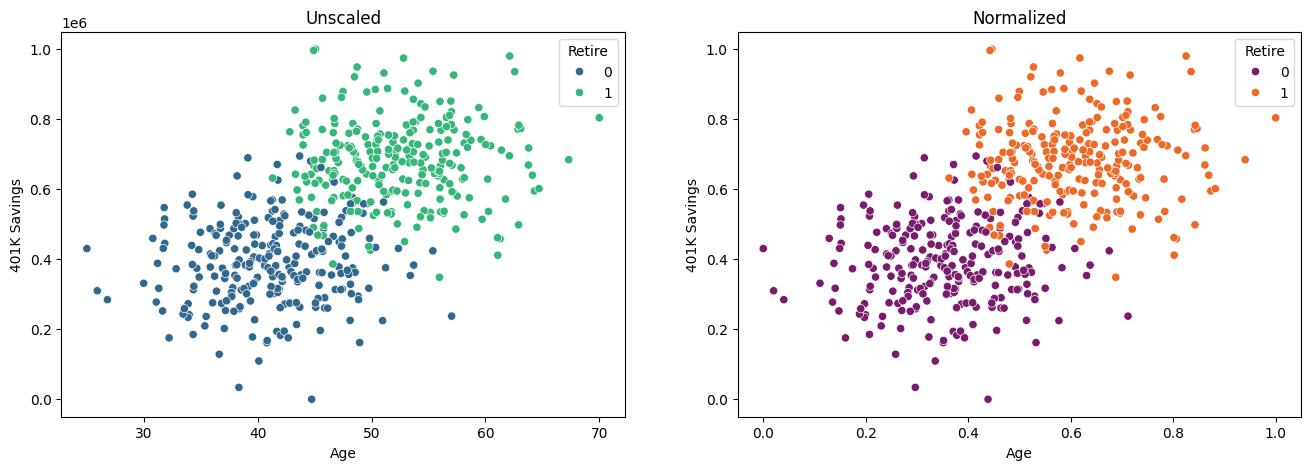

In [92]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.scatterplot(x='Age', y='401K Savings', data=X, hue=df.Retire, palette='viridis')
plt.title('Unscaled')

plt.subplot(122)
sns.scatterplot(x='Age', y='401K Savings', data=X_scaled, hue=df.Retire, palette='inferno')
plt.title('Normalized')

In [93]:
from sklearn.svm import SVC

In [95]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [97]:
y_test_predict_sc = svm_classifier.predict(X_test_scaled)
y_test_predict_sc

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

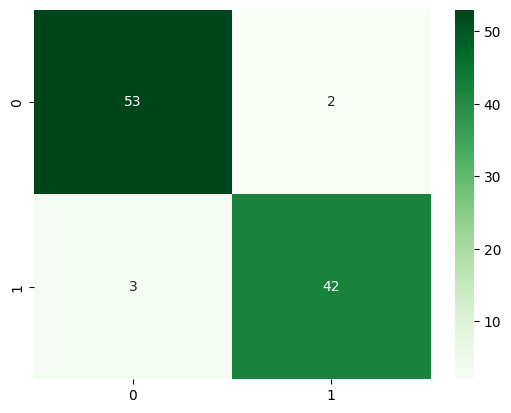

In [104]:
cm = confusion_matrix(y_test, y_test_predict_sc)
sns.heatmap(cm, annot=True, cmap='Greens')

In [105]:
print(classification_report(y_test, y_test_predict_sc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.95      0.93      0.94        45

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [107]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [108]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [110]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [143]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=4, refit=True)

In [112]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s

[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [144]:
dir(grid)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [146]:
X_test.head()

,Age,401K Savings
127,57.463593,703725.7370
415,51.403732,532521.8413
495,46.678128,704243.0776
269,38.280274,466619.1929
257,45.696737,860093.3067


In [147]:
X_test_min = X_test.min()
X_test_max_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min) / X_test_max_range

In [148]:
X_test_scaled.head()

,Age,401K Savings
127,0.686724,0.648164
415,0.535292,0.430568
495,0.417203,0.648822
269,0.207346,0.346808
257,0.392678,0.846903


In [162]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=4, refit=True)

In [164]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [165]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [166]:
y_test_predict_scaled_grid = grid.predict(X_test_scaled)

In [153]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

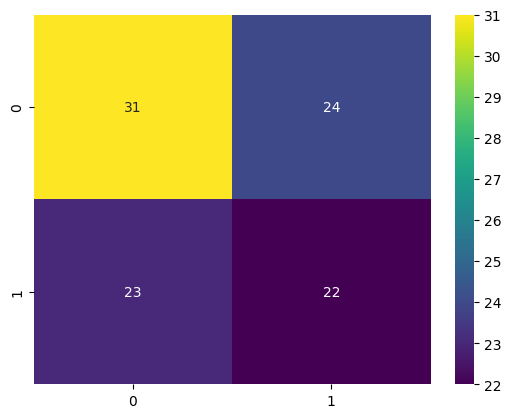

In [167]:
cm = confusion_matrix(y_test, y_test_predict_scaled_grid)
sns.heatmap(cm, annot=True, cmap='viridis')

In [155]:
print(classification_report(y_test, y_test_predict_scaled_grid))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57        55
           1       0.48      0.49      0.48        45

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100



In [156]:
df

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [157]:
testt = df.drop(columns=['Customer ID', 'Retire'], axis=1)
testt

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [158]:
Z = df.drop(columns=['Retire', 'Customer ID'], index=1)
Z

,Age,401K Savings
0,39.180417,322349.8740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
5,50.499789,742398.9068
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [159]:
df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [160]:
?df.drop

Signature:
df.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list

In [161]:
df.drop(['Retire', 'Customer ID'], axis=1)

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


# Index and Axis are not the same thing!

# IMPROVING THE MODEL - PART 2

# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!